# <center>3. Знакомимся с новыми данными: коронавирус

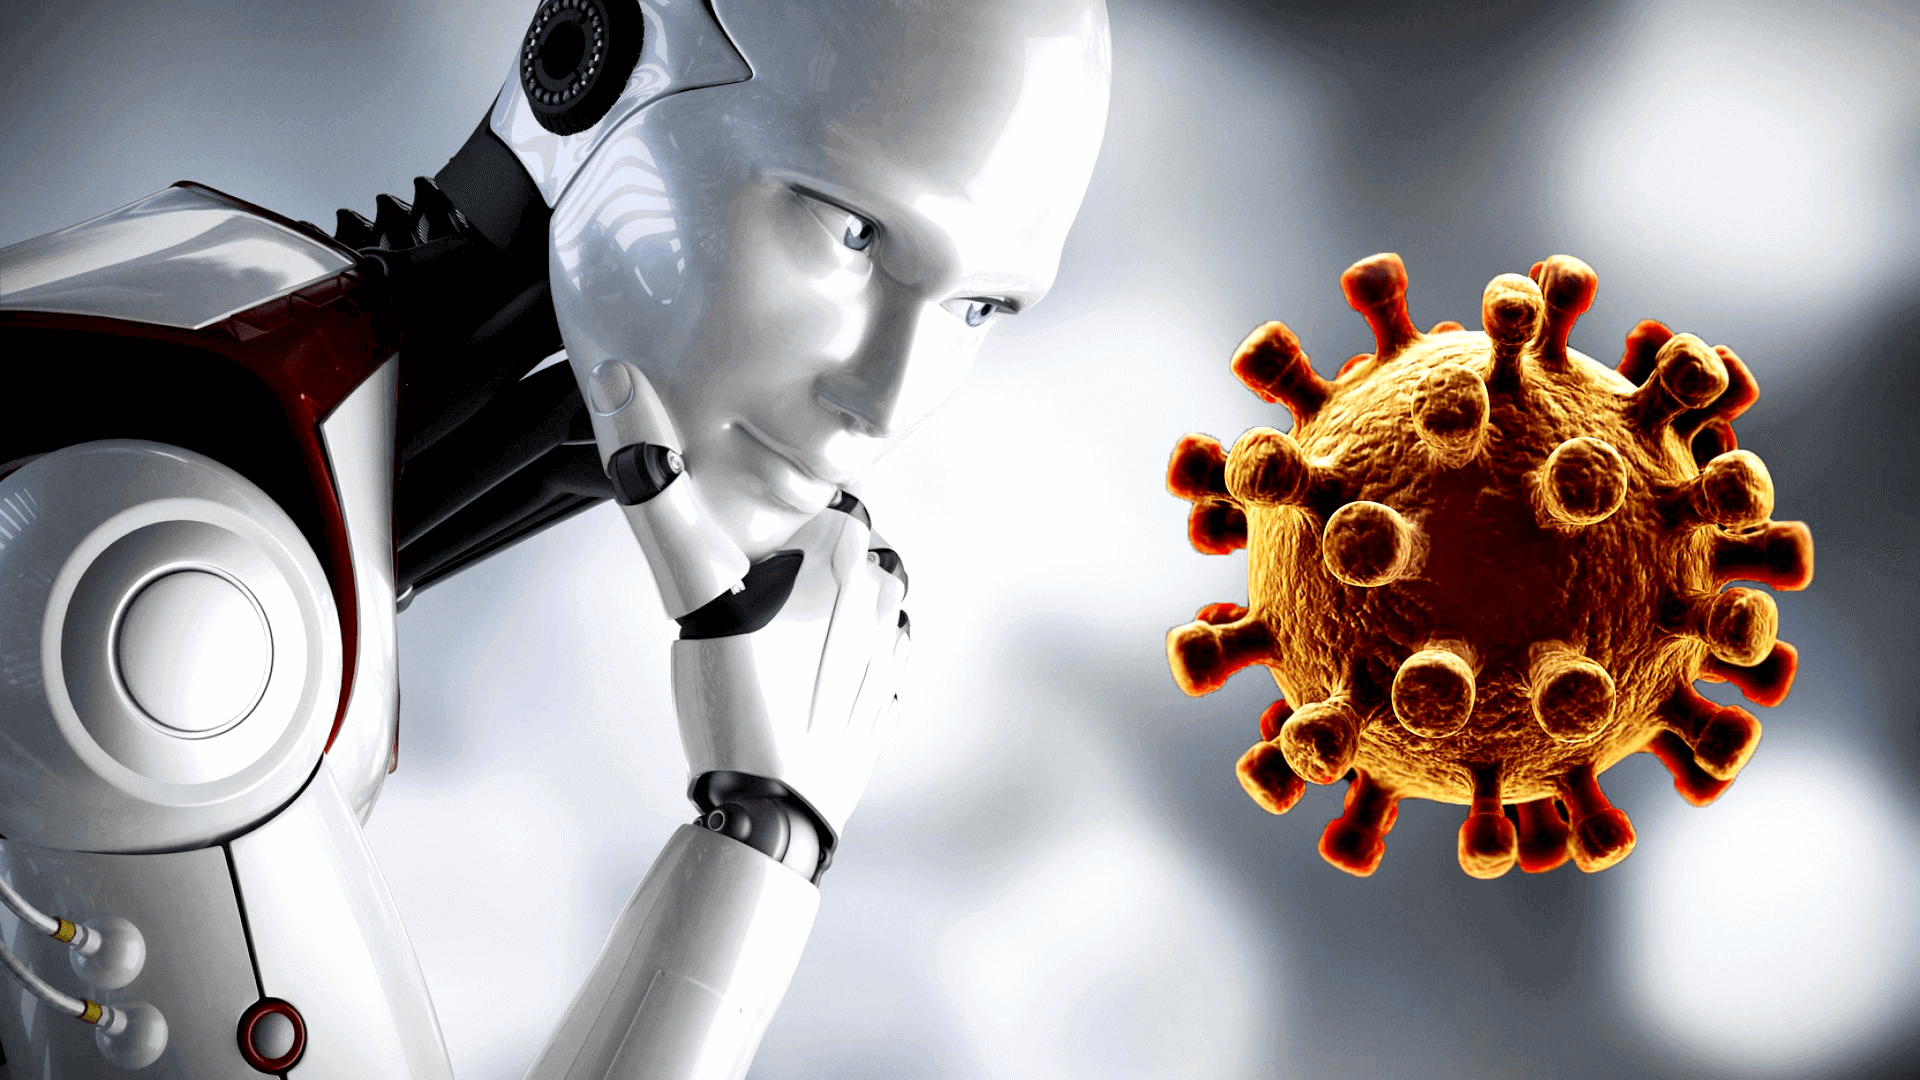

In [10]:
from IPython.display import Image
Image("data/dst3-u1-md13_3_1.png")

Мы будем изучать методы визуализации, используя два набора данных:
1. covid_data — данные о показателях заболеваемости за каждый день в различных регионах 187 стран. 

In [9]:
import pandas as pd
covid_data = pd.read_csv('data/covid_data.csv')
display(covid_data.head())

,date,province/state,country,confirmed,deaths,recovered
0,01/22/2020,Anhui,China,1.0,0.0,0.0
1,01/22/2020,Beijing,China,14.0,0.0,0.0
2,01/22/2020,Chongqing,China,6.0,0.0,0.0
3,01/22/2020,Fujian,China,1.0,0.0,0.0
4,01/22/2020,Gansu,China,0.0,0.0,0.0


Мы будем работать со следующими столбцами:

date — дата наблюдения;
province/state — наименование провинции/штата;
country — наименование страны;
confirmed — общее число зафиксированных случаев на указанный день;
deaths — общее число зафиксированных смертей на указанный день;
recovered — общее число выздоровлений на указанный день.

2. country_vaccinations — данные о процессе вакцинирования людей в 221 стране мира. 

In [12]:
vaccinations_data = pd.read_csv('data/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]
display(vaccinations_data.head())

,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.0,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


Данная таблица содержит следующие столбцы:

country — наименование страны;
date — дата наблюдения;
total_vaccinations — общее число введённых вакцин в стране на указанный день;
people_vaccinated — общее число привитых первым компонентом в стране на указанный день;
people_vaccinated_per_hundred — процент привитых первым компонентом в стране на указанный день (рассчитывается как );
people_fully_vaccinated — общее число привитых вторым компонентом в стране на указанный день (первый компонент уже был введён им ранее);
people_fully_vaccinated_per_hundred — процент привитых вторым компонентом в стране на указанный день (рассчитывается как );
daily_vaccination — ежедневная вакцинация (число вакцинированных в указанный день);
vaccines — комбинации вакцин, используемые в стране.

## <center>НЕМНОГО ОБ ОСОБЕННОСТЯХ ДАННЫХ

В таблице covid_data данные о заболеваемости представлены для каждого региона (штата) страны за каждый день. 
В таблице vaccinations_data параметры вакцинирования отображены для всех стран на каждый день, без учёта регионов.

В данных много пропусков, а также неверно введённых значений. Например, для США (United States) и Великобритании (United Kingdom) в большинстве записей таблицы covid_data число выздоровевших людей равно 0. В данном модуле мы закроем на это глаза, но вообще эти страны подлежали бы исключению из данных или нам понадобился бы дополнительный источник данных, из которого мы смогли бы получить недостающую информацию.

Обратите внимание, что признаки confirmed, deaths, recovered, total_vaccination, people_vaccinated, people_fully_vaccinated — это суммарные показатели по стране, то есть с каждым днём они должны расти. Такие признаки называют накопительными.

Возникает большое желание объединить таблицы. Для этого необходимо учитывать следующие нюансы:
1. В таблице covid_data необходимо предварительно рассчитать суммарное ежедневное число заболевших во всех провинциях/штатах в каждой   стране.

2. В таблицах не совпадает число стран, а иногда и их названия. 

При объединении таблиц по столбцу мы определённо теряем данные (в данной задаче потери незначительны). Избежать этого можно ручными преобразованиями данных — искать различия в названиях стран в таблицах и преобразовывать их. Однако это не является темой данного модуля.

3. Таблицы имеют разные периоды наблюдений (вакцины появились позже, чем сам вирус). Объединив данные с типом inner, мы можем потерять большое количество наблюдений в таблице covid_data.

## <center>ПРЕДОБРАБОТКА ДАННЫХ

Опираясь на замечания выше, выполним небольшую предобработку.

В таблице covid_data:

1. Группируем таблицу по дате и названию страны и рассчитываем суммарные показатели по всем регионам. Тем самым переходим от данных по регионам к данным по странам:

In [13]:
covid_data = covid_data.groupby(
    ['date', 'country'], 
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()

2. Преобразуем даты в формат datetime с помощью функции pd.to_datetime():

In [14]:
covid_data['date'] = pd.to_datetime(covid_data['date'])

3. Создадим признак больных на данный момент (active). Для этого вычтем из общего числа зафиксированных случаев число смертей и число выздоровевших пациентов:

In [15]:
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']

4. Создадим признак ежедневного прироста числа заболевших, умерших и выздоровевших людей. Для этого отсортируем данные по названиям стран, а затем по датам. После этого произведём группировку по странам и рассчитаем разницу между «вчера и сегодня» с помощью метода diff():

In [16]:
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()

Итоговый вид таблицы covid_data:

In [17]:
display(covid_data.head())

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered
11337,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN
11570,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11807,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12051,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12299,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0


В таблице vaccinations_data достаточно будет преобразовать столбцы в формат datetime:

In [18]:
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])
display(vaccinations_data.head())

,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.0,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


Найдем за какой период представлены данные в таблице covid_data? 
Для определения периода можно найти максимум и минимум в столбце date таблицы covid_data.

In [19]:
print(f"Данные о заболеваемости предоставлены от {covid_data['date'].min()} до  {covid_data['date'].max()}")

Данные о заболеваемости предоставлены от 2020-01-22 00:00:00 до  2021-05-29 00:00:00


Найдем за какой период представлены данные в таблице vaccinations_data?
Для определения интервала даты можно найти максимум и минимум в столбца date таблицы vaccination_data.

In [20]:
print(f"Данные о вакцинации предоставлены от {vaccinations_data['date'].min()} до  {vaccinations_data['date'].max()}")

Данные о вакцинации предоставлены от 2020-12-02 00:00:00 до  2021-09-06 00:00:00


С помощью метода merge() объединим таблицы covid_data и vaccinations_data по столбцам date и country.
Тип объединения выставим так, чтобы в результирующую таблицу попали только наблюдения за период, вычисленный в задании 3.1. То есть в результирующую таблицу должны попасть все записи из таблицы covid_data и из её пересечения с vaccinations_data, но не более. Результат объединения занесём в переменную covid_df.
Для объединения по нескольким столбцам передадим в параметр метода merge() список с именами ключей.

In [21]:
covid_df = covid_data.merge(vaccinations_data, on=['date', 'country'], how='left')
print('Число строк: ', covid_df.shape[0])
print('Число столбцов: ', covid_df.shape[1])

Число строк:  86785
Число столбцов:  16


В получившейся таблице covid_df создадим признаки death_rate — общий процент смертей среди зафиксированных случаев (летальность) и recover_rate — общий процент случаев выздоровления. Данные характеристики рассчитаем как отношение числа смертей (deaths) и числа выздоровлений (recovered) к числу зафиксированных случаев (confirmed) и умножим результаты на 100%.

Найдем какова максимальная летальность в США (United States) за весь период.

In [22]:
covid_df['death_rate'] = covid_df['deaths'] / covid_df['confirmed'] * 100
covid_df['recover_rate'] = covid_df['recovered'] / covid_df['confirmed'] * 100
round(covid_df[covid_df['country'] == 'United States']['death_rate'].max(), 2)

7.19

Найдем чему равен средний процент выздоровевших в России (Russia).

In [23]:
round(covid_df[covid_df['country'] == 'Russia']['recover_rate'].mean(), 2)

67.06

In [24]:
display(covid_df.head())

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


## <center>БАЗОВАЯ ВИЗУАЛИЗАЦИЯ В PANDAS

Основным методом для создания простейших графиков в Pandas является plot().

Основные параметры метода plot()
x — название признака, который будет отложен по оси абсцисс;
y — название признака, который будет отложен по оси ординат;
figsize — размер графика (кортеж из ширины и высоты в дюймах);
kind —тип визуализации. Основные типы:
'line' — линейный график (по умолчанию);
'bar' — столбчатая диаграмма;
'barh' — горизонтальная столбчатая диаграмма;
'hist' — гистограмма;
'box' — коробчатая диаграмма (boxplot);
'pie' — круговая диаграмма;
'scatter' — диаграмма рассеяния.
grid — отображение сетки (по умолчанию False);
legend — отображение легенды (по умолчанию False);
title — название графика;
color — цвет.

Начнём с исследования заболеваемости коронавирусом во всём мире. Для этого первым делом отобразим, как менялось ежедневное число заболевших (daily_confirmed) во всём мире во времени. Далее сгруппируем таблицу по датам и подсчитаем суммарное число зафиксированных случаев по дням.

Теперь мы наконец можем построить график с помощью метода plot(). Будем использовать линейный график размером 12x4 (попробуйте взять другие числа, чтобы увидеть разницу). Подпишем график и отобразим сетку. Параметр lw (line width) отвечает за ширину линии для линейного графика.

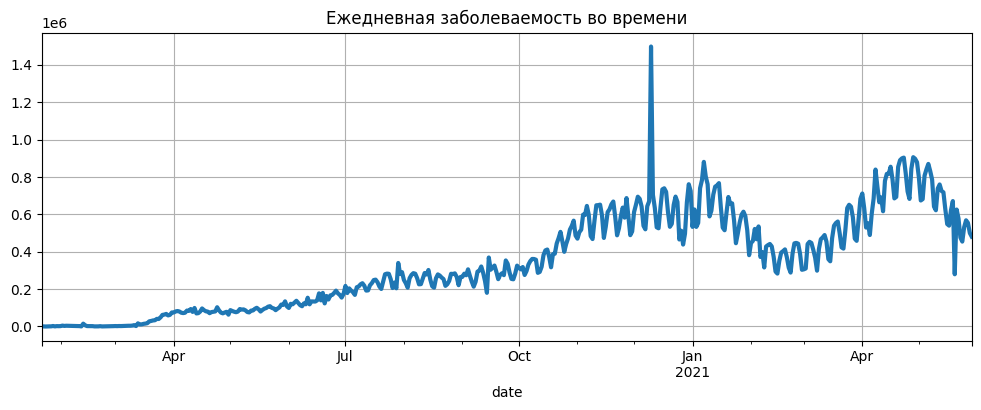

In [27]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(12, 4),
    title='Ежедневная заболеваемость во времени',
    grid = True,
    lw=3
);

Примечание. Обратите внимание, что мы не использовали параметры x и y. Это связано с тем, что в нашем случае переменная grouped_cases — это объект Series.

plot() может являться методом объекта типа DataFrame или Series. При типе DataFrame требуется указать х и у, либо будут построены графики всех столбцов. При типе Series в этом нет необходимости, ведь это и так всего один столбец данных (у) с индексами (х).

При этом по оси абсцисс (х) откладываются индексы (на сгруппированных данных grouped_cases индексы — это даты), а по оси ординат (у) — значения показателей.

Здесь и далее в модуле точка с запятой в последней строке кода используется во избежание вывода на экран служебной информации в ноутбуке (попробуйте её убрать и посмотрите, что будет).

На графике выше отчётливо виден умеренный начальный рост заболеваемости, после чего наблюдается её резкое повышение в середине октября 2020 года, а в декабре 2020 года — аномальная вспышка коронавируса (зафиксировано более 1.4 млн. заболевших в день). Такой резкий максимум, возможно, является ошибкой в данных и требует более детального разбора. Далее заметно постепенное уменьшение числа ежедневно фиксируемых случаев и наступление второй волны в марте 2021 года. Наконец, начиная с мая 2021 года наблюдается очередной спад.

Пилообразность графика (подъёмы и спады с периодом в 7 дней) может быть связана с рабочими и выходными днями.

Нам неизвестно, как устроен во времени процесс постановки диагноза и сбора статистики и отличается ли он в разных странах. Можно предположить, что:

спад в выходные обусловлен меньшей интенсивностью работы медицинских служб;
в тех случаях, когда диагноз ставится по результатам анализа, если в выходные берётся/проводится меньше тестов, к понедельнику они ещё не готовы и диагноз ещё не поставлен;
минимум в понедельник может быть запаздыванием подсчёта статистики, т.е. на самом деле данные за понедельник — это данные за воскресенье.

Теперь построим гистограмму, которая покажет распределение ежедневной заболеваемости во всём мире. Для этого параметр kind выставляем на значение 'hist'. Параметр bins (корзины) отвечает за число прямоугольников в гистограмме — пусть их будет 10 (попробуйте использовать другие числа, чтобы увидеть разницу).

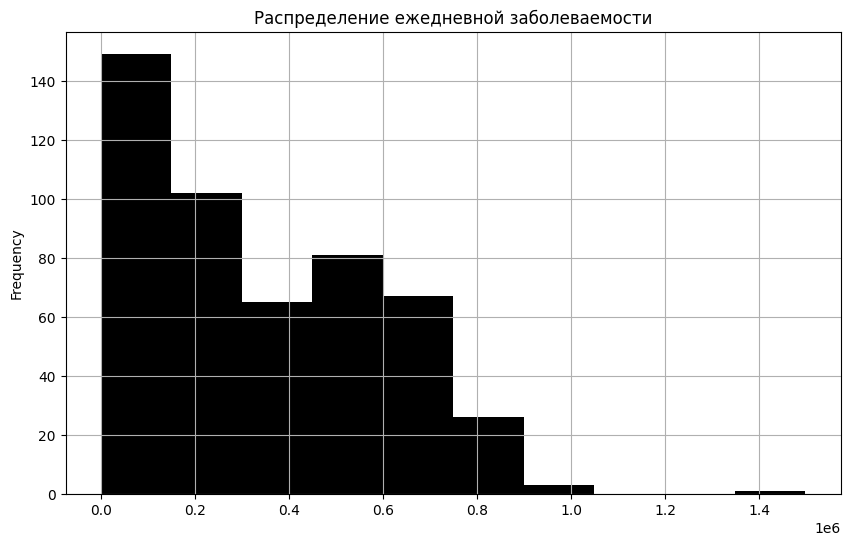

In [28]:
grouped_cases.plot(
    kind='hist',
    figsize=(10, 6),
    title='Распределение ежедневной заболеваемости',
    grid = True,
    color = 'black',
    bins=10
);

По гистограмме можно судить о частоте попадания ежедневной заболеваемости в определённый интервал. На оси абсцисс отложен диапазон ежедневной заболеваемости (в млн человек), разбитый на десять равных интервалов, на оси ординат — число наблюдений, попавших в этот интервал.

Мы видим модальное значение около нуля (от 0 до примерно 150 тыс. заболеваний в день), то есть большинство наблюдений сосредоточено в первом интервале, далее частота постепенно падает. Это связано с тем, что долгое время распространение вируса было довольно слабым.
В глаза бросается «пенёк», соответствующий резкой вспышке заболеваемости, которую мы видели ранее. Его высота очень мала, ведь такое наблюдение единственное. Даже на гистограмме кажется, что данное наблюдение является аномальным и, скорее всего, представляет собой выброс.

Давайте построим столбчатую диаграмму, которая покажет ТОП-10 стран по суммарной заболеваемости.

Для этого сгруппируем данные по странам и вычислим последний зафиксированный показатель с помощью агрегирующего метода last() — он возвращает последнее значение в столбце DataFrame.

Для построения столбчатой диаграммы значение параметра kind выставляем на 'bar'. Параметр colormap отвечает за цветовую гамму графика.

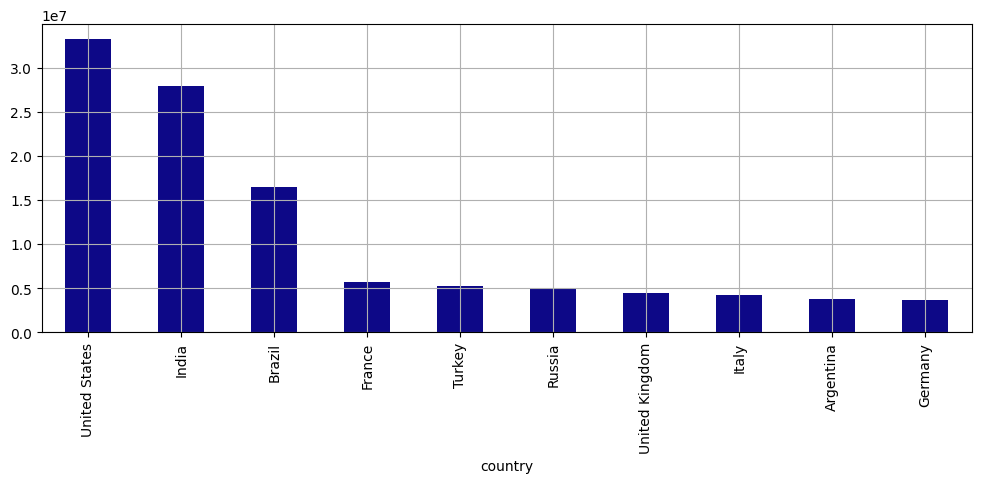

In [29]:
grouped_country = covid_df.groupby(['country'])['confirmed'].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
);

На диаграмме видно, что лидерами по числу заболевших являются Соединённые Штаты, Индия и Бразилия. Соотношение зафиксированных случаев заражения в остальных странах примерно одинаковое.

А теперь посмотрим, как в этих десяти странах соотносится количество заболевших и умерших от вируса. Для этого отобразим сразу два показателя на столбчатой диаграмме: 

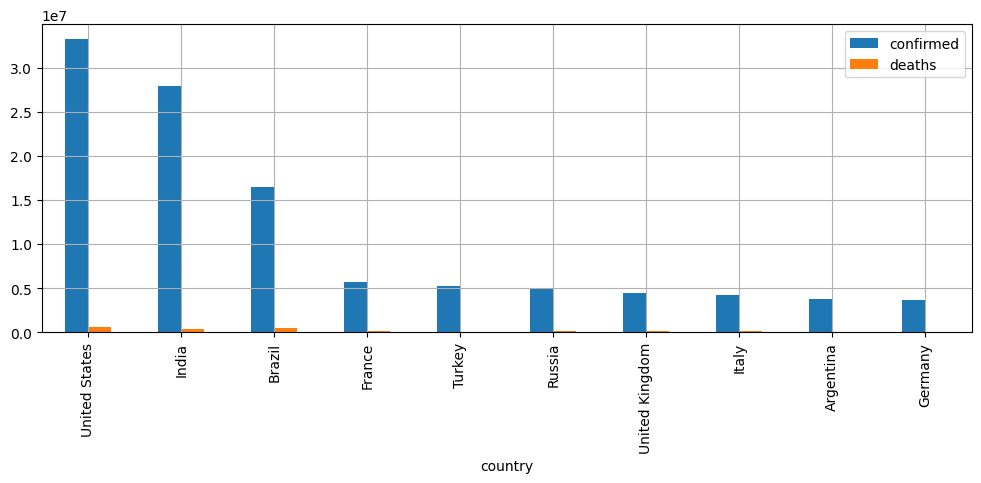

In [30]:
grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['confirmed'])
grouped_country.plot( 
    kind='bar', 
    grid=True, 
    figsize=(12, 4), 
);

Этот график является небольшим усовершенствованием предыдущего. Теперь на нём можно увидеть соотношение зафиксированных случаев заражения и смертей.

Очевидно, что отношение числа умерших к числу заболевших весьма низкое. Также это может косвенно говорить о разных методиках учёта заболевших (например, какие-то страны могут учитывать заболевших только по мазку, в то время как другие — по клинической картине, учитывающей и другие показатели). То есть с методической точки зрения учёт по числу заражений может быть не совсем корректным. Лучшим показателем будет являться число смертей (хотя и этот метод не идеален).

Более того, если построить график с сортировкой не по числу заболевших, а по числу умерших, поменяются и места, и страны в рейтинге.

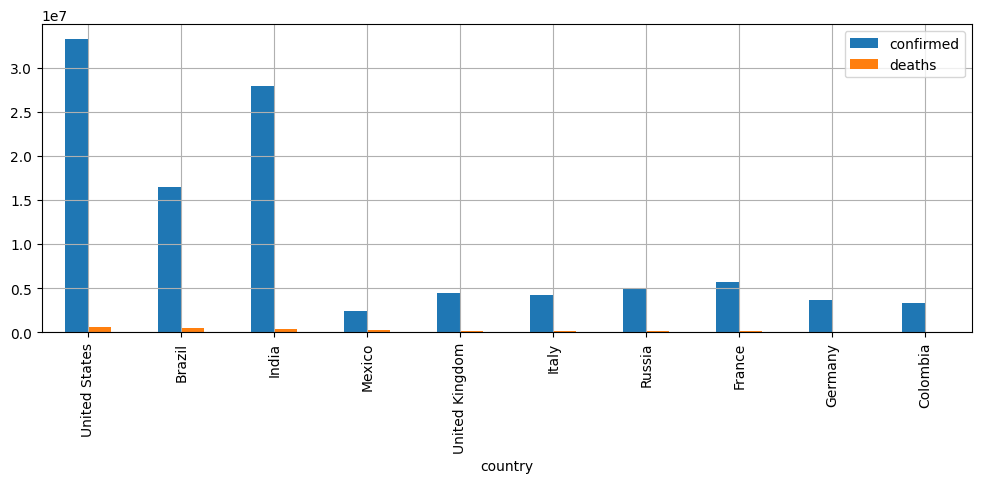

In [31]:
grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['deaths'])
grouped_country.plot( 
    kind='bar', 
    grid=True, 
    figsize=(12, 4), 
);

Визуализация с помощью Pandas является удобным инструментом, когда графики необходимо построить «здесь и сейчас», не сильно заботясь об их внешнем виде. Однако такой подход имеет значительный минус по сравнению с использованием специализированных библиотек для визуализации — довольно ограниченный функционал:

* С помощью Pandas можно построить лишь базовый набор диаграмм. Для построения более сложных видов визуализации Pandas не подходит.
* Трудно настроить визуализацию нескольких видов графиков одновременно в разных масштабах.
* Сложно (иногда и вовсе невозможно) корректировать внешний вид графика.
* Отсутствует 3D-визуализация.

Определим в какой стране число вакцинированных наименьшее?
   Сгруппируем данные по странам.
   Вычислим последнее зафиксированное число заболевших (last в столбце total_vaccinations).
   Выберём ТОП-5 стран по минимальному значению этого показателя с помощью метода nsmallest().
   Вызовём метод plot() с параметром kind='bar'.
В данном задании мы используем метод nsmallest(), который позволяет выбрать n наименьших значений в Series, а также метод last(), с помощью которого можно получить первое непустое значение в группах.

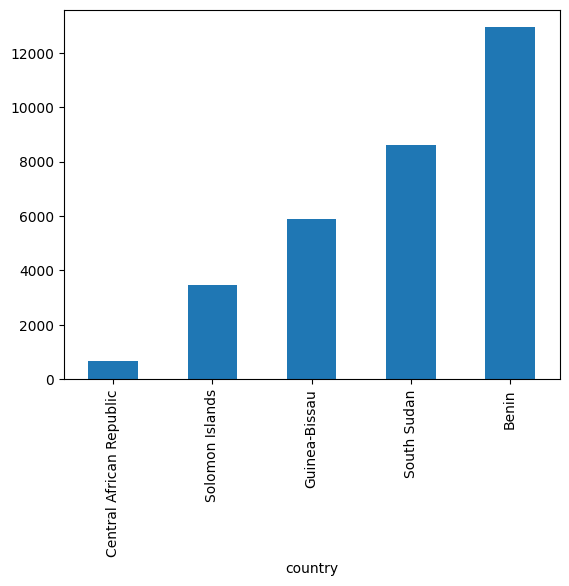

In [32]:
covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar');

## <center> Графические возможности библиотеки Matplotlib

### <center>НЕМНОГО О БИБЛИОТЕКЕ

Matplotlib — это библиотека Python, обладающая большим количеством возможностей для визуализации и настройки отображения графиков и диаграмм.

За визуализацию графиков в Matplotlib отвечает модуль pyplot. Традиционно он импортируется под псевдонимом plt. Для более корректного отображения графиков в ноутбуках используется команда %matplotlib inline.

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

Примечание. Если вы используете тёмную тему в VS Code, то для корректного отображения графиков на тёмном фоне выполните следующую команду по установке стиля отображения:

In [34]:
plt.style.use('default')

### <center>ОСНОВНЫЕ ОБЪЕКТЫ MATPLOTLIB

Библиотека Matplotlib позволяет работать в нескольких режимах. Самый распространённый и мощный по функционалу — объектно-ориентированный режим. Он основан на работе с объектами фигур (figure, их ещё называют канвасами или холстами) и координатных плоскостей (axes, или системы координат). 

Процесс работы над графиком максимально прозрачен: сначала создаётся объект фигуры (fig) , содержащий необходимую информацию и настройки, например размер в дюймах (figsize, восемь дюймов в ширину, четыре — в высоту). К этому объекту с помощью метода add_axes() добавляется координатная плоскость, а на ней располагаются графические объекты. Для создания координатной плоскости необходимо указать её расположение на фигуре в виде списка из координат. В нашем случае она начинается в левом нижнем углу без отступов (координаты 0, 0) и занимает всё отведённое место в области (100%, ширина и высота равны 1).

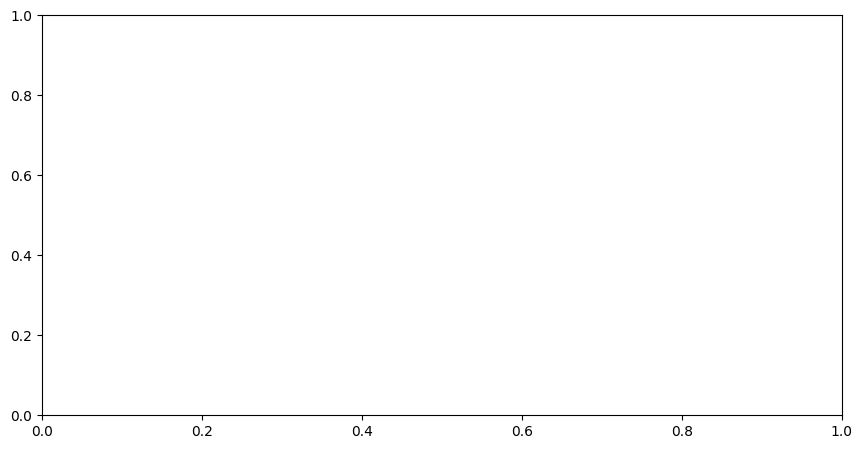

In [35]:
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])

Теперь на созданной системе координат мы можем построить график. 

Утверждается, что коллективная вакцинация позволяет минимизировать риск заражения коронавирусной инфекцией (но только после второго компонента). Давайте проверим это на примере США: построим диаграмму рассеяния, которая покажет зависимость числа ежедневно обнаруживаемых случаев заражения (daily_confirmed) от общего количества привитых вторым компонентом вакцины (people_fully_vaccinated) в США.

У объекта координатной плоскости axes вызовем метод scatter().

Основные параметры метода scatter()
* x, y — последовательности, которые будут отложены по осям абсцисс и ординат;
* s — размер маркеров;
* marker — вид маркеров ('o' — точки, '^' — треугольники);
* c — цвет маркеров.

На диаграмме рассеяния по оси абсцисс откладываем суммарное число поставленных вакцин, а по оси ординат — ежедневный прирост заболевших:

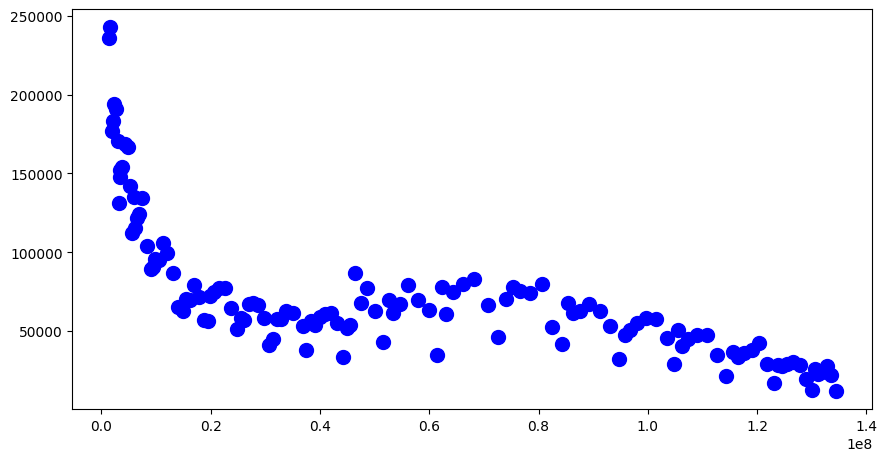

In [37]:
us_data = covid_df[covid_df['country'] == 'United States']

fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=us_data['people_fully_vaccinated'], 
    y=us_data['daily_confirmed'], 
    s=100,
    marker='o',
    c = 'blue'
);

Из диаграммы видно, что, в основном, с ростом числа привитых вторым компонентом людей заболеваемость падает, замедляясь на уровне около 50 тысяч заболевших в день, и продолжает снижение дальше.

Построим круговую диаграмму, чтобы отобразить ТОП-10 комбинаций вакцин в мире.

Примечание. Обратите внимание, что под «распространённостью» вакцины здесь подразумевается не количество введённых доз (таких данных у нас в таблице нет), а количество стран, в которых она используется. При этом подсчёт ведётся не по каждой отдельной вакцине, а по их комбинациям, и одна и та же вакцина учитывается несколько раз в сочетаниях с другими.

Для построения круговых диаграмм в Matplotlib используется метод pie().

Основные параметры метода pie()
* x — значения, по которым будет строиться круговая диаграмма;
* labels — метки, соответствующие значениям;
* autopct — формат отображения долей на диаграмме (например, '%.1f%%' означает, что округление будет производиться до первого знака     после запятой и при выводе будет указан знак "%"; открывающий и закрывающий проценты означают форматирование, а внутренний — вывод знака "%");
* explode — последовательность, которая определяет долю смещения сектора от центра для каждого значения из x.

ТОП-10 комбинаций вакцин (vaccines) по распространённости мы находим с помощью метода value_counts(). Круговую диаграмму строим на полученных значениях, метки для каждого значения — индексы промежуточной таблицы. Будем отображать доли в процентах и округлять их до одного знака после запятой. Самую распространённую вакцину сместим на 10 % от центра:

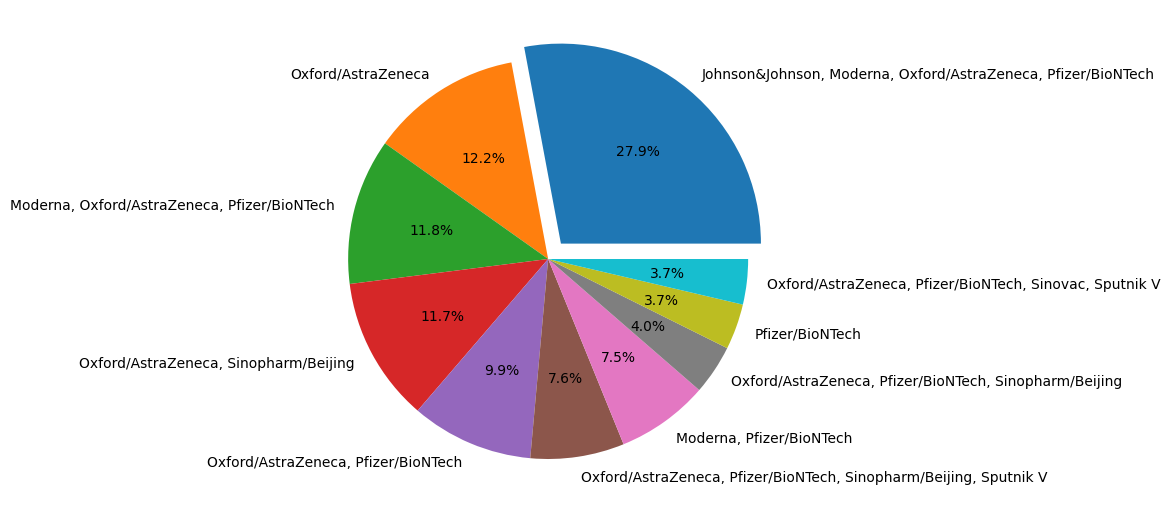

In [39]:
vaccine_combinations = covid_df['vaccines'].value_counts()[:10]
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccine_combinations,
    labels=vaccine_combinations.index,
    autopct='%.1f%%',
    explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
);

Самой распространённой комбинацией вакцин является комбинация: Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech. Причём можно заметить, что в большинстве популярных комбинаций присутствует вакцина Oxford/AstraZeneca.

Обратите внимание, что диаграмма показывает соотношение только для десяти популярных комбинаций вакцин, а не для всех вакцин в совокупности, что является не совсем корректным для круговой диаграммы, так как она должна отображать единое целое.

К тому же наша круговая диаграмма считает количество использований каждой комбинации в таблице, а не количество стран, в которых используется эта комбинация, что также является некорректным.

→ Более правильным вариантом в данном случае было бы выделить каждую вакцину в отдельности и посчитать, в скольких странах она используется.

Однако для этого нам необходимо будет совершить несколько довольно сложных преобразований:
1. Для начала нам необходимо избавиться от пропусков в столбце с вакцинами. Сделаем это с помощью метода dropna(), который удаляет строки, содержащие пропуски в столбце, указанном в параметре subset(). Данный метод мы будем изучать в следующем модуле, посвящённом очистке данных — пока что не вам не стоит заострять на нём внимание:

In [40]:
combination_not_nan = covid_df.dropna(subset=['vaccines'])

2. Полученные данные необходимо сгруппировать по странам (country) и определить последнюю зафиксированную комбинации вакцин в столбце vaccines:

In [41]:
combination_last = combination_not_nan.groupby(['country'])['vaccines'].last()

В результате такого преобразования мы получаем Series, значениями которого являются комбинации вакцин, которые использовались в странах в последний день рассматриваемого периода.

In [42]:
display(combination_last)

country
Afghanistan    Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...
Albania        Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...
Algeria         Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V
Andorra                      Oxford/AstraZeneca, Pfizer/BioNTech
Angola                                        Oxford/AstraZeneca
                                     ...                        
Venezuela          Sinopharm/Beijing, Sinopharm/Wuhan, Sputnik V
Vietnam        Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...
Yemen                                         Oxford/AstraZeneca
Zambia                     Oxford/AstraZeneca, Sinopharm/Beijing
Zimbabwe       Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...
Name: vaccines, Length: 174, dtype: object

3. Преобразуем данные с помощью метода apply(): применим к столбцу lambda-функцию, в которой будем удалять из строки с комбинациями вакцин пробелы и разделять комбинацию на отдельные составляющие по запятым.

In [43]:
combination_last = combination_last.apply(lambda x: x.replace(' ', '').split(','))

В результате в каждой строке столбца получим список с отдельными вакцинами, которые используются в стране:

In [44]:
display(combination_last)

country
Afghanistan    [Johnson&Johnson, Oxford/AstraZeneca, Pfizer/B...
Albania        [Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac,...
Algeria        [Oxford/AstraZeneca, Sinopharm/Beijing, SputnikV]
Andorra                    [Oxford/AstraZeneca, Pfizer/BioNTech]
Angola                                      [Oxford/AstraZeneca]
                                     ...                        
Venezuela         [Sinopharm/Beijing, Sinopharm/Wuhan, SputnikV]
Vietnam        [Moderna, Oxford/AstraZeneca, Pfizer/BioNTech,...
Yemen                                       [Oxford/AstraZeneca]
Zambia                   [Oxford/AstraZeneca, Sinopharm/Beijing]
Zimbabwe       [Oxford/AstraZeneca, Sinopharm/Beijing, Sinova...
Name: vaccines, Length: 174, dtype: object

4. Создадим словарь vaccines_dict={}, ключами которого будут являться уникальные вакцины, а значениями — количество стран, в которых они используются. Изначально словарь пустой.

5. Заполнение словаря реализуем «в лоб» — используя циклы. Во внешнем цикле будем проходиться по всем элементам Series combination_last. На каждой итерации цикла в переменной цикла vaccines_list будет находиться список вакцин, которые используются в стране.

Во внутреннем цикле будем проходиться по элементам этого списка, вакцинам. Переменную внутреннего цикла назовём vaccine.

В теле внутреннего цикла проверяем условие, что текущей вакцины ещё нет среди ключей словаря vaccones_dict. Если это условие выполняется, добавляем вакцину в словарь со значением 1. В противном случае увеличиваем текущее количество стран, в которых используется данная вакцина:

In [45]:
vaccines_dict = {} 
#создаём цикл по элементам Series combination_last
for vaccines_list in combination_last:
    #создаём цикл по элементам списка с вакцинами
    for vaccine in vaccines_list:
        #проверяем условие, что текущей вакцины ещё нет среди ключей словаря
        if vaccine not in vaccines_dict:#если условие выполняется
            vaccines_dict[vaccine] = 1 #заносим вакцину в словарь со значением 1
        else: #в противном случае
            vaccines_dict[vaccine] += 1 #увеличивает количество

6. В результате работы получаем словарь, который преобразуем в объект Series. Далее выделим семь наиболее популярных вакцин, а остальные обозначим как 'other'. Для этого сортируем Series по убыванию. Вычислим суммарное количество стран, в которых используются вакцины, не попавшие в наш ТОП-7, результат запишем в Series по индексу 'other'.

Далее выделим восемь наибольших значений в полученной Series — для них и будем строить круговую диаграмму.

In [46]:
vaccines = pd.Series(vaccines_dict).sort_values(ascending=False)
vaccines['other'] = vaccines[7:].sum()
vaccines = vaccines.sort_values(ascending=False)[:8]

7. Строим круговую диаграмму:

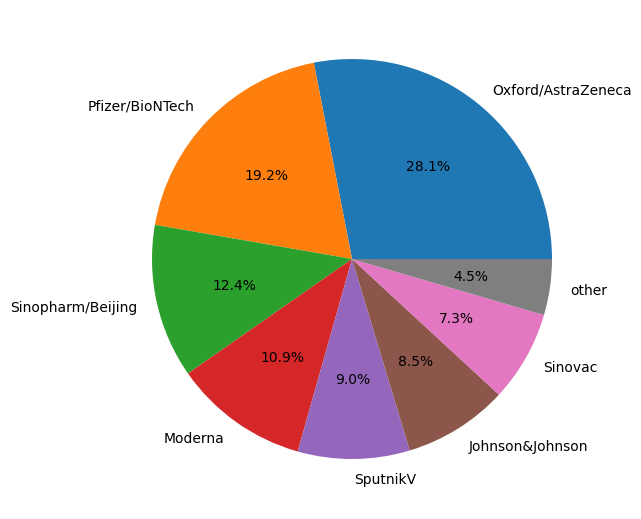

In [47]:
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccines,
    labels=vaccines.index,
    autopct='%.1f%%',
);

### <center>ДОБАВЛЕНИЕ ИНФОРМАТИВНОСТИ В ГРАФИКИ

Вы, наверное, заметили, что до этого мы не подписывали графики. График не имеет смысла, если без лишних слов непонятно, что на нём изображено. Управлять информативностью графика можно с помощью методов координатной плоскости axes. Перечислим основные из них (не пугайтесь, запоминать их не обязательно — вы всегда сможете подсмотреть их в документации):
* axes.set_title() — заголовок диаграммы, а также его настройки (например, параметр fontsize отвечает за размер шрифта);
* axes.set_xlabel() — название оси абсцисс;
* axes.set_ylabel() — название оси ординат;
* axes.set_xticks() — установка отметок на оси абсцисс;
* axes.set_yticks() — установка отметок на оси ординат;
* axes.xaxis.set_tick_params() — управление параметрами отметок на оси абсцисс (например, параметр rotation отвечает за поворот отметок в градусах);
* axes.yaxis.set_tick_params() — управление параметрами отметок на оси ординат;
* axes.legend() — отображение легенды;
* axes.grid() — установка сетки.

Например, изобразим на одном графике, как росла общая заболеваемость (confirmed), число зафиксированных смертей (deaths), выздоровевших пациентов (recovered) и активных случаев (active) в Китае.

Для построения линейных графиков в Matplotlib используется метод plot() (не путайте с методом plot() в Pandas!). При вызове метода без параметров по оси ординат откладываются значения столбца таблицы, по оси абсцисс — индексы (в нашем случае это будут даты). 

Дополнительно в параметрах метода указываем параметр label — название графика, которое будет отображаться на легенде, а также lw — ширину линии графика. Добавим к графику заголовок, названия осей, установим метки по оси y с частотой в 10 000, повернём метки по оси x на 30 градусов, а также добавим легенду (метки для легенды выставляются в параметре label метода plot()):

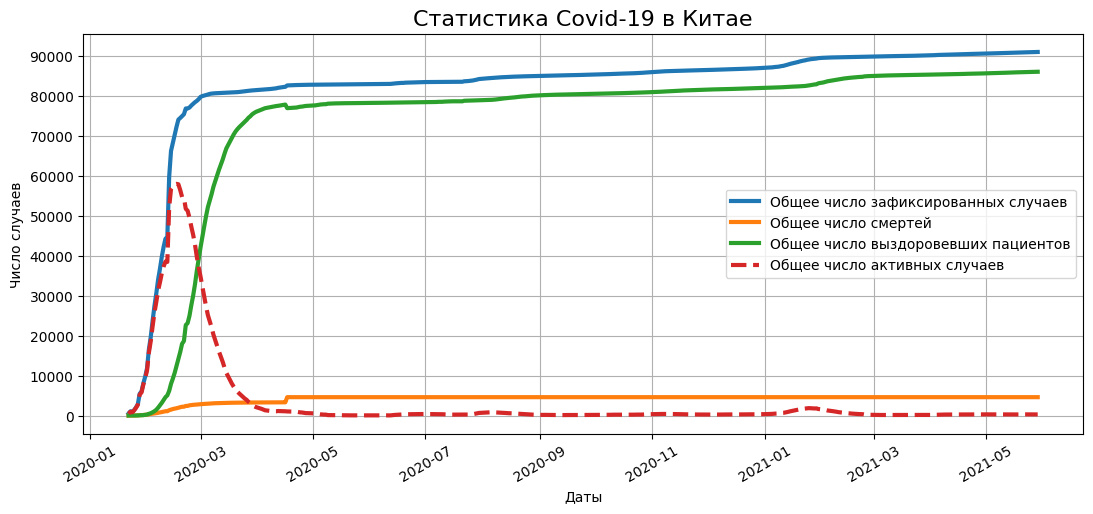

In [48]:
china_data = covid_df[covid_df['country'] == 'China']
china_grouped = china_data.groupby(['date'])[['confirmed', 'active', 'deaths', 'recovered']].sum()

#визуализация графиков
fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(china_grouped['confirmed'], label='Общее число зафиксированных случаев', lw=3)
axes.plot(china_grouped['deaths'], label='Общее число смертей', lw=3)
axes.plot(china_grouped['recovered'], label='Общее число выздоровевших пациентов', lw=3)
axes.plot(china_grouped['active'], label='Общее число активных случаев', lw=3, linestyle='dashed')

#установка параметров отображения
axes.set_title('Статистика Covid-19 в Китае', fontsize=16)
axes.set_xlabel('Даты')
axes.set_ylabel('Число случаев')
axes.set_yticks(range(0, 100000, 10000))
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend();

На графике наблюдается резкий рост заболеваемости на начальном периоде до середины февраля 2020 года, после чего видно резкое падение числа активных случаев (примерно в этот период власти Китая ввели тотальный локдаун и прекратили транспортное сообщение со всем миром). Далее число активных случаев только падает, а темп прироста числа заболевших снижается. При этом общее число смертей в Китае остаётся практически на одном уровне (около 5 тысяч), уже начиная с мая 2020 года (новые пациенты умирают крайне редко).

Стоит обратить внимание на сдвиги в графиках. Они являются свидетельством противоречия в данных: общее число выздоровевших пациентов почему-то резко упало, а число умерших возросло. Почему так произошло? Произошёл пересчёт числа заболевших? Данные были утеряны или искажены? Если вы в своей практике столкнётесь с такими же противоречиями, вам необходимо будет обратиться к первоисточнику, чтобы выяснить причину.

### <center>ИСПОЛЬЗОВАНИЕ НЕСКОЛЬКИХ СИСТЕМ КООРДИНАТ

При использовании библиотеки Matplotlib вовсе не обязательно ограничиваться одной системой координат.

→ Вы можете размещать несколько систем координат на одной фигуре, что позволит нам отображать вспомогательную информацию на основном графике.

Для добавления второй системы координат необходимо повторно применить к объекту fig метод add_axes, указав новое имя для второй системы координат.

Например, отобразим ТОП-5 стран по общему числу привитых вторым компонентом людей (people_fully_vaccinated), а также ТОП-5 стран по числу полностью привитых на 100 человек населения (people_fully_vaccinated_per_hundred).

Для этого построим столбчатые диаграммы с помощью метода bar().

Основные параметры метода bar()
* x — названия категорий, которые будут располагаться по оси абсцисс;
* height — высота столбцов диаграммы, массив из показателей для визуализации (например, среднее, максимальное значение и т. д.);
* width — ширина столбцов диаграммы;
* color — цвет.

Группируем таблицу по странам, находим последний по дате зафиксированный показатель с помощью метода last() и выбираем ТОП-5 стран с использованием метода nlargest().

При отображении графиков создаём две координатные плоскости main_axes и insert_axes, на каждой из них отдельно строим столбчатые диаграммы.

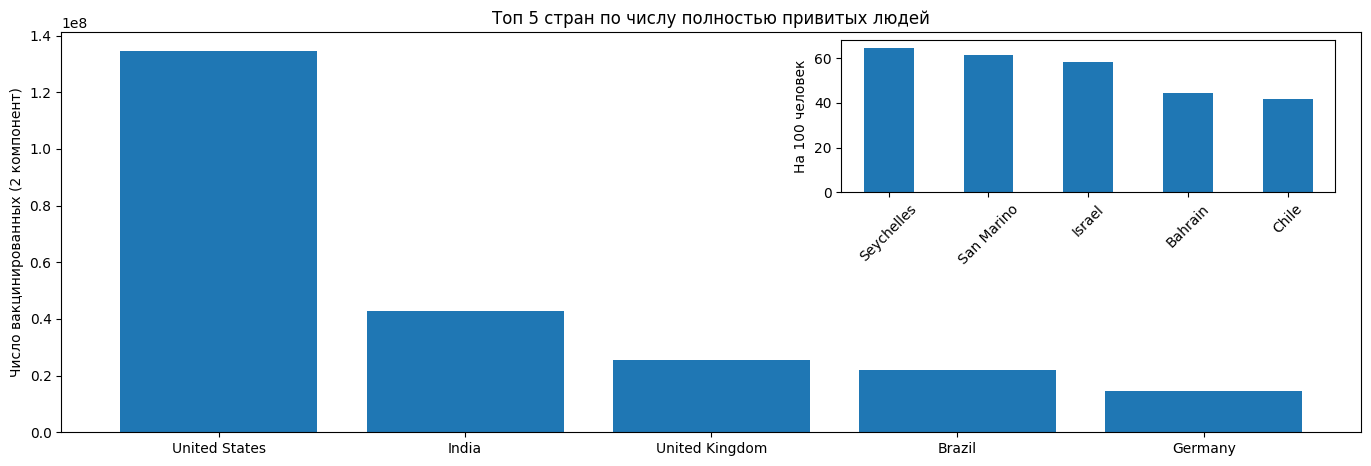

In [50]:
vacc_country = covid_df.groupby('country')['people_fully_vaccinated'].last().nlargest(5)
vacc_country_per_hundred = covid_df.groupby('country')['people_fully_vaccinated_per_hundred'].last().nlargest(5)

#визуализация главного графика
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(x = vacc_country.index, height = vacc_country);
main_axes.set_ylabel('Число вакцинированных (2 компонент)')
main_axes.set_title('Топ 5 стран по числу полностью привитых людей')

#визуализация вспомогательного графика
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = vacc_country_per_hundred.index, height = vacc_country_per_hundred, width=0.5);
insert_axes.set_ylabel('На 100 человек')
insert_axes.xaxis.set_tick_params(rotation=45)

Примечание. Первые два числовых параметра, указанные при создании систем координат, — это отступ снизу и слева, следующие два — ширина и высота относительно ширины и высоты всего пространства (в долях единицы) для построения графика.

Нетрудно заметить, что два представленных рейтинга отличаются: лидером по числу полностью привитых является США, а вот по числу вакцин на 100 человек населения — Сейшелы. В первый список попали страны с большим количеством населения, которое они активно прививают. Во второй список попали маленькие страны, которые проще всего обеспечить вакциной.

В наш ТОП не попали страны, которые пользуются однокомпонентной вакциной, например Китай.

### <center>SUBPLOTS

Создание дополнительных систем координат с помощью метода add_axes() полезно, однако используется не так часто.

В большинстве случаев для отображения нескольких систем координат используется функция subplots(). Она создаёт целую таблицу из систем координат на одной фигуре. Функция возвращает новую фигуру, а также список координатных плоскостей.

Основные параметры метода subplots()
* nrows — число строк;
* ncols — число столбцов;
* figsize — общий размер фигуры в дюймах (ширина и высота).

Например, следующий код создаст шесть координатных плоскостей, сведённых в таблицу размера 2x3:

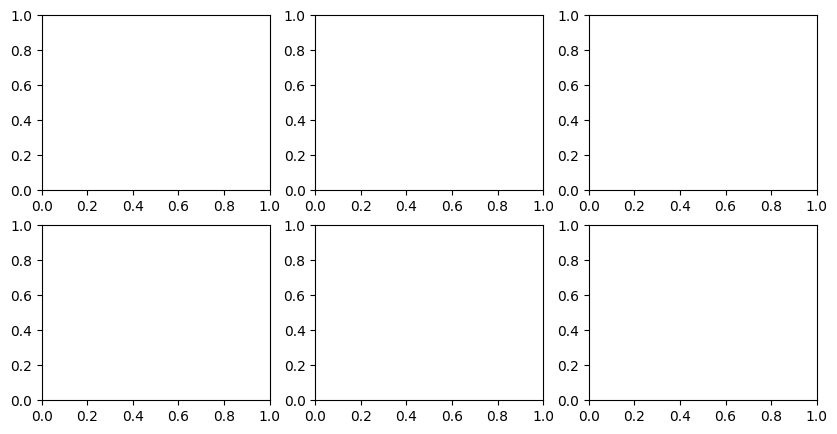

In [51]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))

Теперь, обладая знаниями о методе subplots(), построим три графика:

1. Столбчатую диаграмму, которая покажет динамику ежедневной вакцинации в России.
2. Линейный график изменения ежедневной заболеваемости в стране.
3. Гистограмму ежедневной заболеваемости в стране.
За построение гистограмм в библиотеке Matplotlib отвечает метод hist().

Основные параметры метода hist()
* x — массив чисел, для которого строится гистограмма;
* bins — число столбцов (корзин);
* orientation — ориентация гистограммы (по умолчанию 'vertical');
* color — цвет.

Фильтруем таблицу covid_data по признаку страны и выбираем записи только для России.

Для того чтобы отобразить график в соответствующей координатной плоскости, нужно обратиться к списку axes по индексу (от 0 до 2). Дальнейшая настройка графиков вам уже известна.

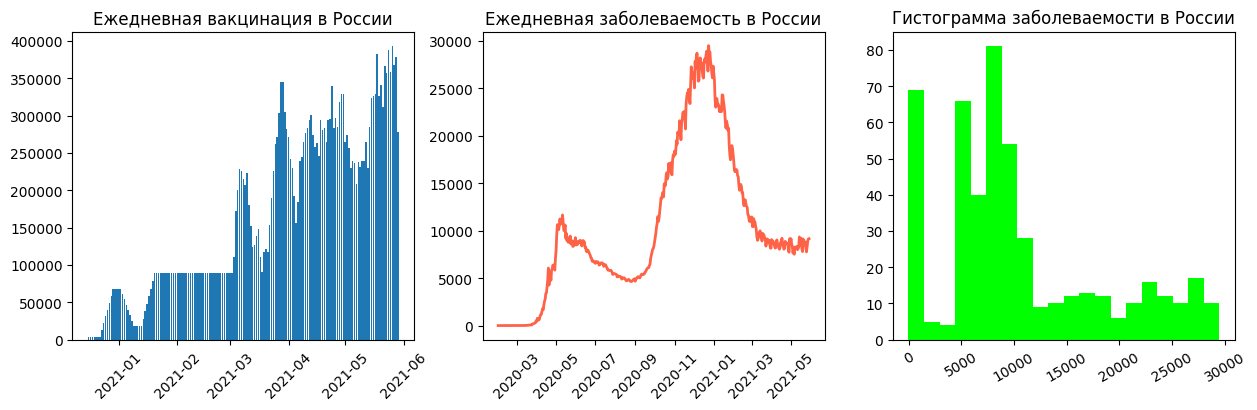

In [52]:
russia_data = covid_df[covid_df["country"] == "Russia"]

# визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

# столбчатая диаграмма
axes[0].bar(
    x=russia_data["date"],
    height=russia_data["daily_vaccinations"],
    label="Число вакцинированных",
)
axes[0].set_title("Ежедневная вакцинация в России")
axes[0].xaxis.set_tick_params(rotation=45)

# линейный график
axes[1].plot(
    russia_data["date"],
    russia_data["daily_confirmed"],
    label="Число заболевших",
    color="tomato",
    lw=2,
)
axes[1].set_title("Ежедневная заболеваемость в России")
axes[1].xaxis.set_tick_params(rotation=45)

# гистограмма
axes[2].hist(
    x=russia_data["daily_confirmed"], label=["Число заболевших"], color="lime", bins=20
)
axes[2].set_title("Гистограмма заболеваемости в России")
axes[2].xaxis.set_tick_params(rotation=30)

* На первом графике можно наблюдать колеблющийся рост числа ежедневно вакцинированных людей. Особенно в глаза бросается «пенёк» в период с конца января до начала марта 2021 года. Это период, когда данные о процессе вакцинации людей не обновлялись.

* На втором графике мы видим две волны коронавируса в России. Первая — в середине марта 2020 года, которая достигла максимума в 13 тысяч заболевших за сутки. Вторая волна, судя по графику, началась в октябре 2020 года и достигла своего пика почти в 30 тысяч заболевших за сутки в конце декабря этого же года (точные данные: 24 декабря было зафиксировано рекордное число подтверждённых случаев: 29935).

Далее с ростом показателей вакцинации и введением новых карантинных мер заболеваемость снова постепенно снижается.

* На третьем графике можно увидеть, что большая часть наблюдений ежедневной заболеваемости находится в интервале от 5 до до 10 тысяч человек в день. Ещё один пик гистограммы находится около 0 — это случаи, зафиксированные на начальных этапах эпидемии (в Россию Covid-19 пришёл позже, чем во многие другие страны).

Также стоит отметить, что, помимо объектно-ориентированного подхода в работе с библиотекой Matplotlib, вы можете встретить и модульный подход.

Модульный подход основан на обращении к модулю pyplot (plt) напрямую, а не средствами объектов фигур и плоскостей. Например, следующий код строит столбчатую диаграмму: по оси x откладываются элементы списка names (названия групп), а высоту столбцов определяет список values.

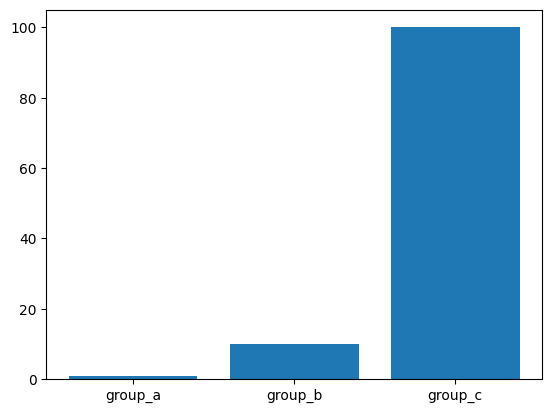

In [53]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]
plt.bar(names, values)
plt.show()

И модульный, и объектно-ориентированный подходы имеют одинаковое право на существование.

ТОП-5 стран по общему числу сделанных прививок
Данные группируются по признаку страны, и рассчитывается последнее значение общего числа сделанных прививок в каждой стране. Далее выбираются пять стран, где значение этого показателя наибольшее. На основе этих данных строится столбчатая диаграмма.

<BarContainer object of 5 artists>

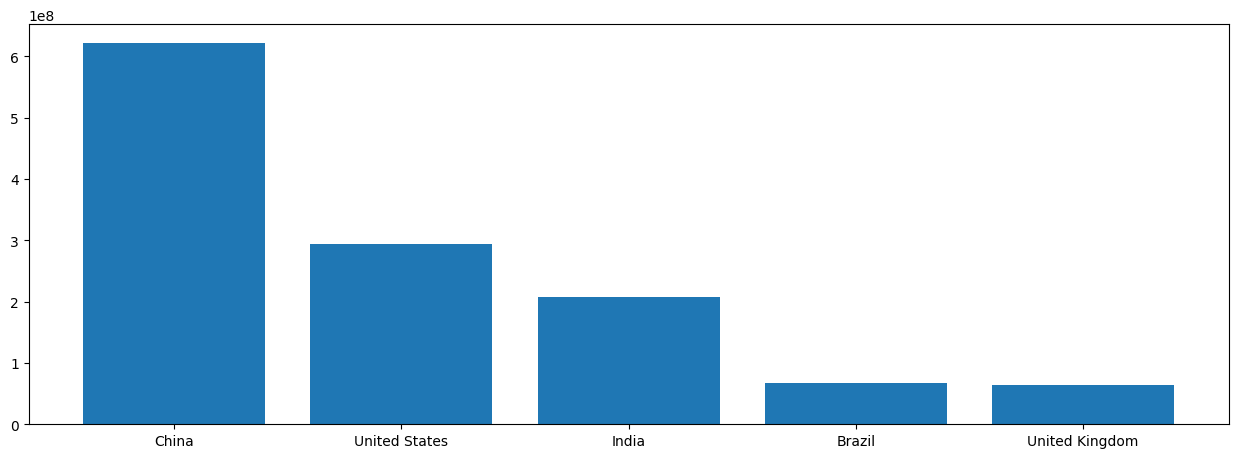

In [54]:
v = covid_df.groupby(['country'])['total_vaccinations'].last().nlargest(5)
fig = plt.figure(figsize=(12, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x=v.index,height=v)

## <center>Графические возможности библиотеки Seaborn

### <center>НЕМНОГО О БИБЛИОТЕКЕ

Традиционно Seaborn импортируется под псевдонимом sns:

In [55]:
import seaborn as sns
print(sns.__version__)

0.12.1


В данном разделе мы будем сравнивать несколько стран: Россию, Австралию, Германию, Канаду и Великобританию. Создадим специальный DataFrame croped_covid_df для этих данных.

Для фильтрации по списку значений используем метод isin(), который проверяет, есть ли запись в столбце в переданном в метод списке. В результате возвращается привычная нам маска.

⭐ А теперь снова немного магии Feature Engineering, чтобы показатели по странам стали сопоставимыми: добавим информацию о населении стран, чтобы рассчитать ежедневную заболеваемость на 100 человек — заболеваемость в процентах от общего количества населения (daily_confirmed_per_hundred).

In [56]:
countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
croped_covid_df = covid_df[covid_df['country'].isin(countries)]

populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)
croped_covid_df = croped_covid_df.merge(populations, on=['country'])
croped_covid_df['daily_confirmed_per_hundred'] = croped_covid_df['daily_confirmed'] / croped_covid_df['population'] * 100
croped_covid_df.head()

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate,population,daily_confirmed_per_hundred
0,2020-01-23,Australia,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25726900,NaN
1,2020-01-25,Australia,4.0,0.0,0.0,4.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000016
2,2020-01-26,Australia,4.0,0.0,0.0,4.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000
3,2020-01-27,Australia,5.0,0.0,0.0,5.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000004
4,2020-01-28,Australia,5.0,0.0,0.0,5.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000


Начнём с гистограммы. Для визуализации гистограмм в библиотеке Seaborn используется метод histplot().

У данного метода (как и у всех методов библиотеки Seaborn) огромнейшее количество параметров. Мы приведём лишь основные.

Основные параметры метода histplot()
* data — DataFrame, по которому строится график;
* x — признак, который будет отложен по оси абсцисс;
* y — признак, который будет отложен по оси ординат;
* hue — группировочный категориальный признак, который позволяет строить отдельный график для каждой категории (не стоит использовать его для гистограмм, но он широко используется для других видов графиков в Seaborn);
* ax — система координат Matplotlib, в которой строится график;
* color — цвет графика;
* bins — число столбцов в гистограмме (по умолчанию вычисляется автоматически с помощью специальных формул);
* kde — параметр, указывающий, стоит ли сглаживать гистограмму кривой (по умолчанию False).

Построим сразу две гистограммы: одна будет иллюстрировать общее распределение ежедневной заболеваемости (daily_confirmed), а вторая — то же распределение в разрезе стран. 

Для этого создаём две координатные плоскости с помощью метода subplots(). 

На первой координатной плоскости рисуем простую гистограмму с 25 столбцами, а также добавим на неё сглаживающую кривую. 

На второй гистограмме добавляем параметр названия страны по оси y. В таком случае количество наблюдений будет обозначаться на диаграмме яркостью цвета (чем темнее полоса, тем больше наблюдений находится в интервале).

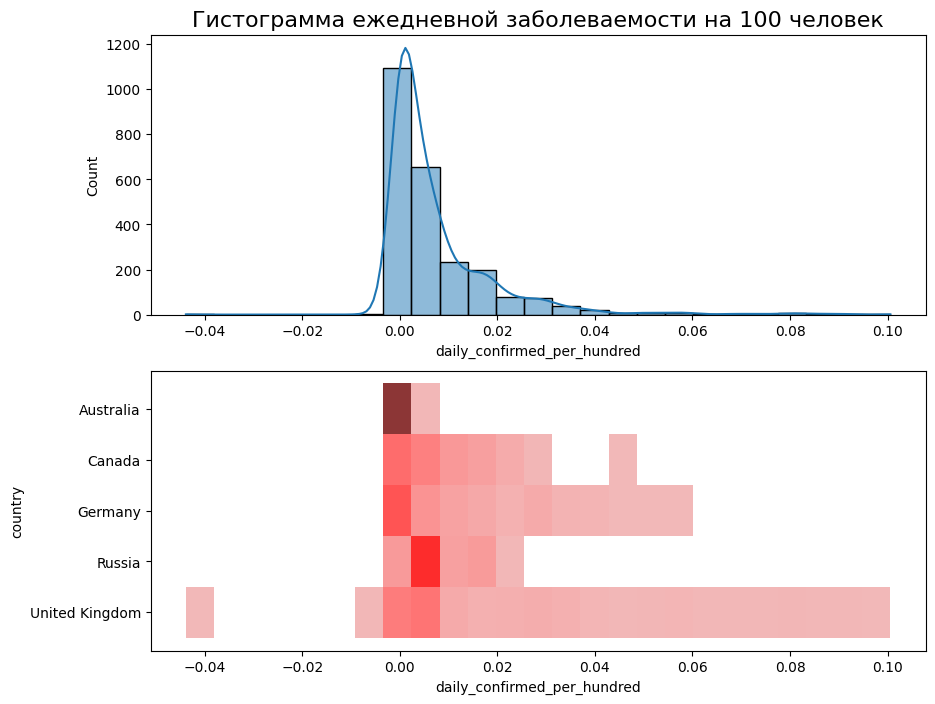

In [57]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    bins=25,
    kde=True,
    ax=axes[0]
);
axes[0].set_title('Гистограмма ежедневной заболеваемости на 100 человек', fontsize=16)
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    y='country',
    bins=25,
    color='red',
    ax=axes[1]
);

Общая гистограмма показывает, что ежедневная заболеваемость в выбранных странах не превышает 0.1 % от общего количества населения, причём большая часть наблюдений сосредоточена около 0. 

Также отчётливо видны аномалии — маленькие «пеньки», где заболеваемость отрицательная.

Гистограмма по странам показывает, какой вклад в общее распределение вносит заболеваемость в каждой из стран по отдельности. Например, ясно, что пик около нуля на общей гистограмме в основном задаётся Австралией, так как в ней ежедневная заболеваемость не превышала 0.005 % от общего числа населения (около 1.5 тыс. человек в день) и все наблюдения сосредоточены в двух интервалах. Чуть больший разброс по числу фиксируемых в день случаев имеет Россия, затем идут Канада, Германия и Великобритания.

Отличительной особенностью распределения для России и Великобритании является то, что для них характерен больший процент заболевших (самая тёмная отметка находится правее, чем у других стран).

Наконец, видно, что аномальная отрицательная заболеваемость принадлежит Великобритании. Об аномалиях, их поиске как с помощью визуализации, так и иными методами мы ещё будем говорить в модуле по очистке данных.

На самом деле при использовании Seaborn необязательно передавать координатные плоскости в аргументы функций. Графики в библиотеке вполне себе самодостаточны: функции для построения графика возвращают объект Axes из библиотеки Matplotlib, с которыми мы уже умеем работать. Достаточно просто занести результат выполнения функции в переменную и использовать её для настройки графика.

построим коробчатые диаграммы признака летальности (death_rate)

Коробчатые диаграммы в Seaborn строятся с помощью метода boxplot().

Ящики отразим горизонтально (для этого по оси x отложим признак летальности, а по оси y — страны), параметр orient отвечает за ориентацию диаграммы, а width — за ширину коробок:

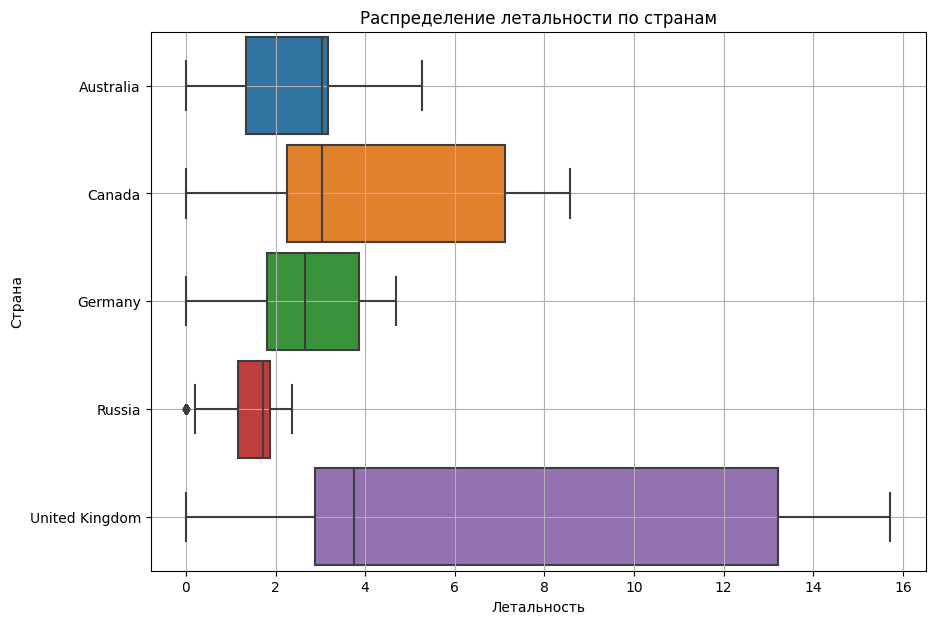

In [58]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    y='country',
    x='death_rate',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение летальности по странам');
boxplot.set_xlabel('Летальность');
boxplot.set_ylabel('Страна');
boxplot.grid()

Из выделенных стран наиболее стабильная во времени летальность от коронавируса — в России (ширина ящика наименьшая), она же является самой низкой (наименьшая медиана). Наибольший разброс имеет процент смертей в Великобритании, что объясняется вирусологами и британскими СМИ как неподготовленность страны к эпидемии в её начале, что приводило к высокой летальности. Однако, судя по тому что медианное значение летальности в стране практически совпадает со всеми остальными, можно сказать, что со временем обстановка стабилизировалась.

Теперь рассмотрим пример многоуровневой столбчатой диаграммы. С помощью неё мы можем, например, посмотреть на средний ежедневный процент заболевших в странах по кварталам.

Для построения столбчатых диаграмм в Seaborn используется метод barplot(). По умолчанию метод отображает среднее по столбцу, который указан в параметре x (вместо среднего можно вычислить и любую другую статистическую характеристику, наименование которой задаётся в параметре estimator). Для добавления многоуровневости используется параметр hue, который позволяет группировать данные по признаку:

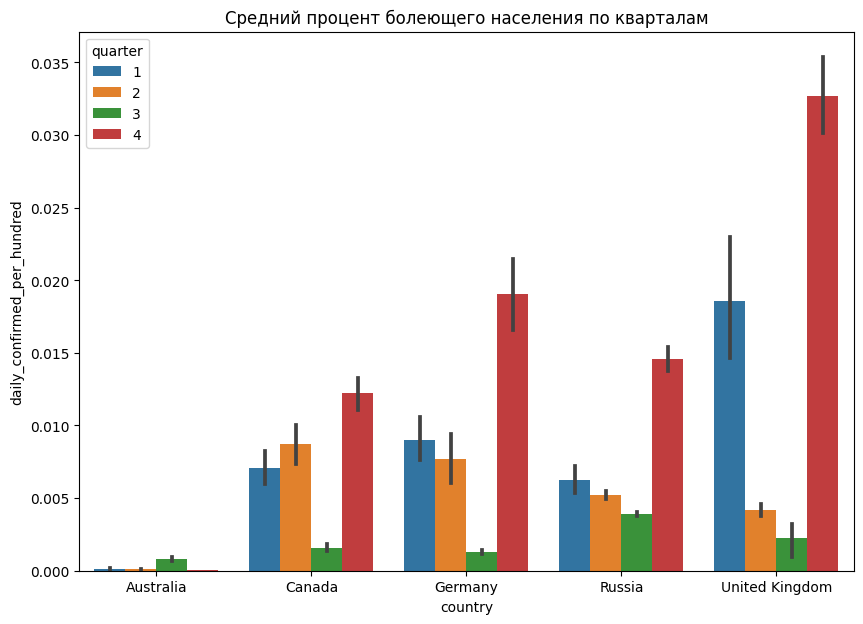

In [59]:
fig = plt.figure(figsize=(10, 7))
croped_covid_df['quarter'] = croped_covid_df['date'].dt.quarter
barplot = sns.barplot(
    data=croped_covid_df,
    x='country',
    y='daily_confirmed_per_hundred',
    hue='quarter',
)
barplot.set_title('Средний процент болеющего населения по кварталам');

Диаграмма показывает, как зависит средний ежедневный процент заболевших от страны и квартала. Отчётливо видно, что во всех странах (кроме Австралии), большинство людей заболевают в четвёртом квартале (октябрь, ноябрь, декабрь), когда иммунитет особенно ослаблен, а наименьшее число заболевших соответствует третьему кварталу (июль, август, сентябрь).

Построим один из самых любимых дата-сайентистами графиков — jointplot() — в котором совмещены диаграмма рассеяния и гистограмма. Это довольно удобный и полезный инструмент, когда мы хотим одновременно посмотреть и на распределения переменных, и сразу оценить их взаимосвязь.

Построим jointplot зависимости ежедневной заболеваемости в странах от общей численности населения в процентах (daily_confirmed_per_hundred) от числа полностью вакцинированных в процентах (people_fully_vaccinated_per_hundred).

Параметры xlim и ylim определяют диапазон отображения осей x и y. Параметр height отвечает за высоту и ширину графика (он квадратный).

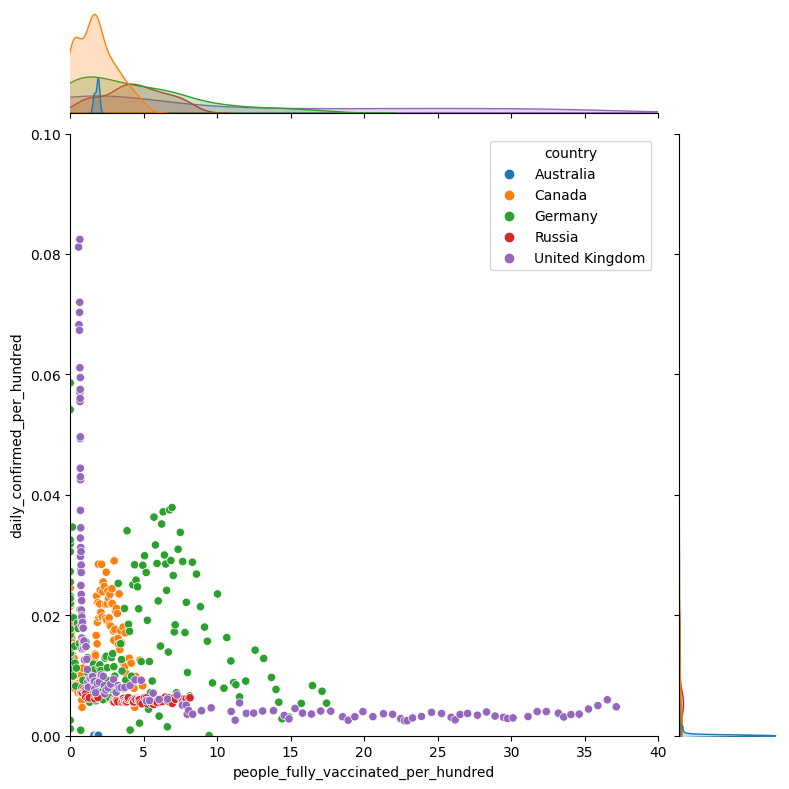

In [60]:
jointplot = sns.jointplot(
    data=croped_covid_df, 
    x='people_fully_vaccinated_per_hundred', 
    y='daily_confirmed_per_hundred',
    hue='country',
    xlim = (0, 40),
    ylim = (0, 0.1),
    height=8,
)

Из графика для Великобритании и России наблюдается следующая тенденция: с увеличением числа полностью привитых людей уменьшается ежедневное число заболевших. Для Канады и Германии такая же тенденция наблюдается только после достижения отметки в 7 % полностью привитого населения. Однако это может быть стечением обстоятельств, так как вирусологи говорят о необходимости полного вакцинирования 60 % населения в стране для снижения заболеваемости.

Допустим, мы хотим сравнить темпы вакцинации по странам во времени. Вы, скорее всего, сразу подумали о линейном графике. Но давайте мыслить шире. Когда мы хотим сравнить скорость изменения показателей по малому количеству категорий (в данном случае — по странам, а их у нас их всего пять), нагляднее всего будет тепловая карта.

Предварительно создадим сводную таблицу: по столбцам отложим признак даты, а по строкам — страны. В ячейках таблицы будет находиться процент вакцинированных (первым компонентом) людей в стране на определённую дату. Чтобы даты отображались на тепловой карте верно, их необходимо привести к типу string.

In [61]:
pivot = croped_covid_df.pivot_table(
    values='people_vaccinated_per_hundred',
    columns='date',
    index='country',
)
pivot.columns = pivot.columns.astype('string')
display(pivot)

date,2020-12-13,2020-12-14,2020-12-15,2020-12-16,2020-12-17,2020-12-18,2020-12-19,2020-12-20,2020-12-21,2020-12-22,...,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29
country,,,,,,,,,,,,,,,,,,,,,
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.40,12.69,12.88,13.28,13.73,14.18
Canada,NaN,0.0,0.00,0.01,0.02,0.03,0.03,0.03,0.05,0.07,...,48.10,49.25,50.14,50.89,51.77,52.39,53.05,53.95,54.99,55.71
Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.18,39.68,39.95,40.11,40.29,40.64,41.29,41.87,42.40,42.61
Russia,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,0.04,...,10.20,10.30,10.50,10.53,10.70,10.81,11.07,11.12,11.19,11.29
United Kingdom,0.13,NaN,NaN,NaN,NaN,NaN,NaN,0.99,NaN,NaN,...,55.01,55.33,55.63,55.82,55.99,56.27,56.61,56.99,57.29,57.56


Для построения тепловой карты в Seaborn используется метод heatmap(). Данный метод работает с табличными данными и визуализирует все ячейки таблицы с помощью цвета. Параметр annot отвечает за отображение легенды (аннотации), параметр cmap — за цветовую гамму графика.

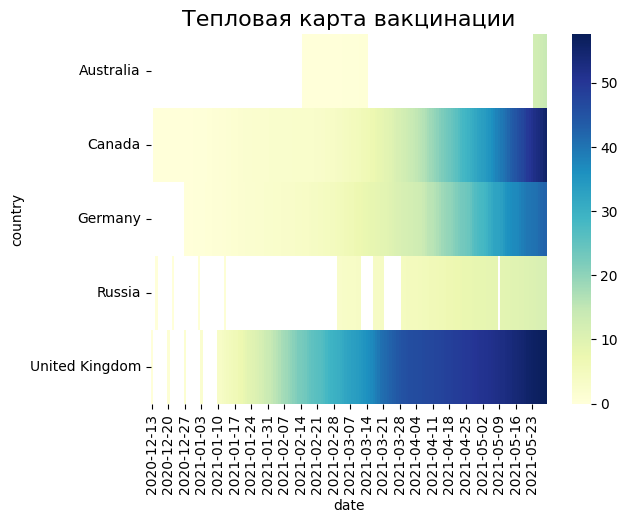

In [62]:
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта вакцинации', fontsize=16);

По тепловой карте легко можно понять, в каких странах темпы вакцинации выше, а в каких — ниже. Согласно легенде справа, чем ближе цвет полосы к синему, тем больше процент вакцинированных людей. Чем быстрее полоса переходит от блёклого жёлтого к насыщенному синему, тем выше темп вакцинации. Белые полосы обозначают отсутствие информации за данный период.

Так, можно судить, что наиболее активно кампания по вакцинации проходила в Великобритании, и на конец периода число вакцинированных первым компонентом людей в стране превысило отметку в 50 % от общего числа населения. В Канаде вакцинация населения вначале проходила медленнее, однако к концу периода наблюдений общий процент вакцинированных первым компонентом сравнялся с Великобританией.

Темпы вакцинации в России и Австралии гораздо ниже: здесь число привитых на конец периода составляет около 10 % от общего числа населения.

При этом с помощью тепловой карты мы смогли увидеть, что в данных о вакцинации в России, Великобритании и Австралии содержатся пропуски, и мы даже можем узнать, за какие периоды, посмотрев на ось абсцисс.

Как вы уже успели понять, Seaborn расширяет границы визуализации, делает её более информативной и понятной. Графики становятся более приятными визуально, и их вполне можно использовать для отчёта по анализу рынка, демонстрации результатов моделирования и т. д.

Создадим новый признак confirmed_per_hundred, который покажет процентное отношение заболевших вирусом к общему числу населения в странах (confirmed/population*100).
Построим тепловую карту, которая покажет, как росло число заболевших в процентах от общего числа населения (confirmed_per_hundred) в странах из таблицы croped_covid_df.
Построим сводную таблицу, столбцы которой — даты, строки — страны, а ячейки — процент заболевшего населения.

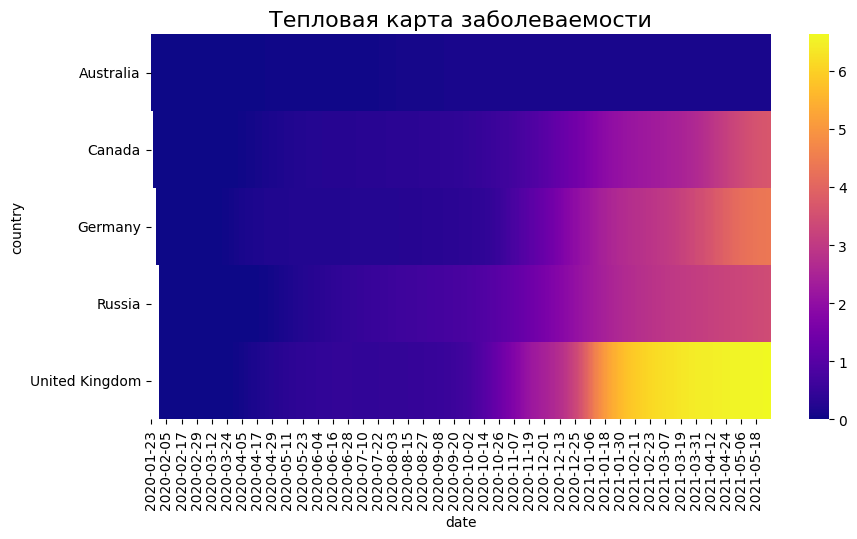

In [64]:
croped_covid_df['confirmed_per_hundred'] = croped_covid_df['confirmed']/croped_covid_df['population'] * 100
pivot = croped_covid_df.pivot_table(
    values='confirmed_per_hundred',
    columns='date',
    index='country'
)
pivot.columns = pivot.columns.astype('string')
fig = plt.figure(figsize=(10, 5))

heatmap = sns.heatmap(data=pivot, cmap='plasma')
heatmap.set_title('Тепловая карта заболеваемости', fontsize=16);

Построим коробчатую диаграмму для признака recover_rate (отношение выздоровлений к числу зафиксированных случаев заболевания в процентах).

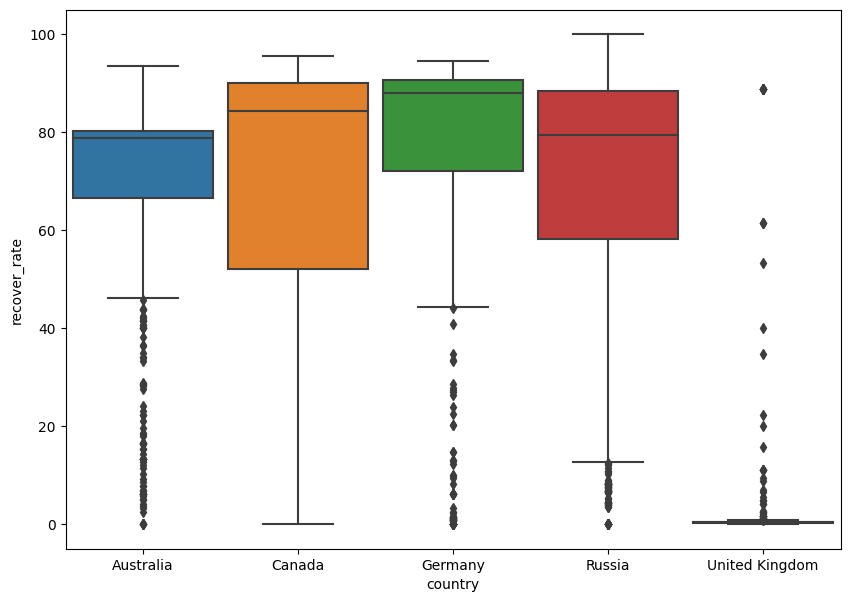

In [65]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    x='country',
    y='recover_rate',
    orient='v',
    width=0.9
);

## <center>Графические возможности библиотеки Plotly

### <center>НЕМНОГО О БИБЛИОТЕКЕ

Библиотека Plotly является сравнительно новым коммерческим продуктом с бесплатной версией, который создавался специально для Data Science, в отличие от относительно старой библиотеки Matplotlib, которая изначально разрабатывалась для научных вычислений.

→ Библиотека Plotly позволяет строить интерактивные графики, которые можно приближать, отдалять, а также просматривать значения на графике в реальном времени. К тому же в библиотеке собрано огромнейшее количество красочных методов визуализации. У Plotly приятный дизайн, а способов работы с ней несколько.

→ С помощью Plotly можно делать сложные визуализации с элементами управления, например строить интерактивную 3D-визуализацию, карту мира и многое другое.

Раньше дата-сайентисты использовали Plotly как «тяжёлую артиллерию» по визуализации данных для задач, в которых нужны крайне специфичные графики, которых нет в традиционных библиотеках (например, тепловой карты мира), или в задачах составления красивых дашбордов.

Это было связано с тем, что традиционный Plotly имеет огромную функциональность со множеством параметров, в которых легко запутаться. Графики в библиотеке строятся иногда десятками строк кода, отрисовываются медленно и очень сильно нагружают видеокарту.

Сейчас, с появлением новых оптимизированных модулей и надстроек в Plotly (express и cufflinks), которые позволили упростить работу с библиотекой, в отрасли наблюдается тенденция постепенного перехода бизнеса к использованию Plotly при работе с данными, ведь бесплатную версию библиотеки разрешено применять в коммерческих продуктах.

Библиотека нуждается в дополнительной установке. Для этого введите в командной строке (или командной строке Anaconda) следующее:

In [ ]:
pip install plotly

Из библиотеки нам понадобятся модуль express(Модуль для экспресс-визуализации "здесь и сейчас" с ограниченными настройками и немногочисленными видами графиков), он традиционно импортируется под псевдонимом px.

Также импортируем саму библиотеку, чтобы можно было вывести её версию:

In [67]:
import plotly
import plotly.express as px
print(plotly.__version__)

5.11.0


     ---------------------------------------- 15.3/15.3 MB 3.4 MB/s eta 0:00:00


Если установка Plotly прошла верно, при выполнении кода выше отобразится версия библиотеки. Актуальные версии — 5.3 и выше.
Примечание. Для того чтобы графики Plotly отображались в VS Code, необходимо установить расширение Jupyter Notebook Renderers.

После установки не забудьте перезапустить VS Code.